Computer Vision Project 

Luca Facin


# Creation and Training of CNN for Trees Recognition

169009152/169001437 [==============================] - 11s 0us/step
Epoch 1/15
4000/4000 [==============================] - 18s 4ms/step - loss: 0.6829 - accuracy: 0.5957 - val_loss: 0.6630 - val_accuracy: 0.5940
Epoch 2/15
4000/4000 [==============================] - 18s 5ms/step - loss: 0.6234 - accuracy: 0.6513 - val_loss: 0.5647 - val_accuracy: 0.7160
Epoch 3/15
4000/4000 [==============================] - 18s 5ms/step - loss: 0.5498 - accuracy: 0.7128 - val_loss: 0.4378 - val_accuracy: 0.7710
Epoch 4/15
4000/4000 [==============================] - 17s 4ms/step - loss: 0.4618 - accuracy: 0.7975 - val_loss: 0.5065 - val_accuracy: 0.7490
Epoch 5/15
4000/4000 [==============================] - 17s 4ms/step - loss: 0.4074 - accuracy: 0.8372 - val_loss: 0.3851 - val_accuracy: 0.8340
Epoch 6/15
4000/4000 [==============================] - 18s 4ms/step - loss: 0.3676 - accuracy: 0.8503 - val_loss: 0.3545 - val_accuracy: 0.8420
Epoch 7/15
4000/4000 [==============================] - 18s 4m

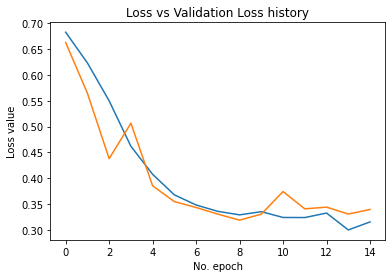

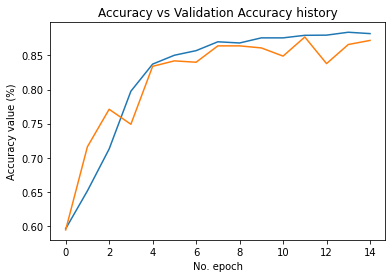

In [ ]:
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

# Model configuration
batch_size = 1
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = binary_crossentropy
no_classes = 1
no_epochs = 15
optimizer = Adam()
validation_split = 0.2
verbosity = 1

# Load CIFAR-100 data
(input_train, label_train), (input_test, label_test) = cifar100.load_data()

CIFAR100_LABELS_LIST = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]

# Selection of only a part of cifar100
CIFAR100_TREE_LIST = [47, 52, 56, 59, 96]
CIFAR100_NON_TREE_LIST = [49, 51, 60, 82, 83]

# Creation of binary label
# (1 if a tree and 0 if not a tree)
target_train = np.zeros((np.size(label_train, 0), 1))
index_train = []
for i in range(len(target_train)):
  if label_train[i] in CIFAR100_TREE_LIST:
    target_train[i] = 1
    index_train.append(i)
  if label_train[i] in CIFAR100_NON_TREE_LIST:
    index_train.append(i)

target_test = np.zeros((np.size(label_test, 0), 1))
index_test = []
for i in range(len(target_test)):
  if label_test[i] in CIFAR100_TREE_LIST:
    target_test[i] = 1
    index_test.append(i)
  if label_train[i] in CIFAR100_NON_TREE_LIST:
    index_test.append(i)

# Split the images and the labels into "low dimension" training and test sets
input_train = np.asarray(input_train)[np.asarray(index_train)]
input_test = np.asarray(input_test)[np.asarray(index_test)]
target_train = np.asarray(target_train)[np.asarray(index_train)]
target_test = np.asarray(target_test)[np.asarray(index_test)]

# Determine shape of the data
input_shape = (img_width, img_height, img_num_channels)

# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Normalize data
input_train = input_train / 255
input_test = input_test / 255

# Create the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(no_classes, activation='sigmoid'))

# Compile the model
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

# Fit data to model
history = model.fit(input_train, target_train,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            validation_split=validation_split)

# Generate generalization metrics
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# Visualize history
# Plot history: Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs Validation Loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()
# Plot history: Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs Validation Accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

Saving model in Google Drive

In [ ]:
import os
# Saving model
save_dir = os.path.join(os.getcwd(), 'drive/My Drive')
model_name = 'trainedCNN_trees_recognition.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Test Trained Model

[[1.]]


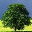

[[1.]]


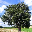

[[1.]]


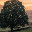

[[0.]]


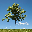

[[0.]]


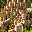

[[0.]]


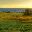

In [1]:
import cv2
import glob
import numpy as np
import tensorflow as tf
from google.colab.patches import cv2_imshow

# import model from google drive
my_model = tf.keras.models.load_model('/content/drive/My Drive/trainedCNN_trees_recognition.h5')
# import test images
files = glob.glob("/content/drive/My Drive/testimages/*.jpg")
data = []
for f1 in files:
    img = cv2.imread(f1)
    data.append(img)
my_array = np.array(data)
# test the model for all the images
for x in range(len(my_array)):

  my_array[x] = cv2.resize(my_array[x], (32, 32))

  # reshape for CNN
  image = my_array[x].reshape(1, 32, 32, 3)
  # predict with CNN
  prediction = my_model.predict([image])
  # print the prediction
  print(prediction)
  # print the image
  cv2_imshow(my_array[x])




Saving the model for C++ (note: this precedure need %tensorflow_version 1.x)

In [ ]:
from keras import backend as K

def freeze_session(session, keep_var_names=None, output_names=None, clear_devices=True):
   graph = session.graph
   with graph.as_default():
       freeze_var_names = list(set(v.op.name for v in tf.global_variables()).difference(keep_var_names or []))
       output_names = output_names or []
       output_names += [v.op.name for v in tf.global_variables()]
       input_graph_def = graph.as_graph_def()
       if clear_devices:
           for node in input_graph_def.node:
               node.device = ''
       frozen_graph = tf.graph_util.convert_variables_to_constants(
           session, input_graph_def, output_names, freeze_var_names)
       return frozen_graph

frozen_graph = freeze_session(K.get_session(), output_names=[out.op.name for out in my_model.outputs])
tf.train.write_graph(frozen_graph, './', 'trained_cnn.pbtxt', as_text=True)
tf.train.write_graph(frozen_graph, './', 'trained_cnn.pb', as_text=False)